In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from mobilenet_utils import plot_training_history

# Params
img_size = 224
batch_size = 32
num_classes = 10

# Paths
# train_dir = r"C:\Users\jakub\Desktop\muzyka_guiio\Music-Classification\project_data\train_spectrograms"
# test_dir = r"C:\Users\jakub\Desktop\muzyka_guiio\Music-Classification\project_data\test_spectrograms"
train_dir = r"C:\Users\Dell\Desktop\Music-Classification-MobileNet1\project_data\train_spectrograms"
test_dir = r"C:\Users\Dell\Desktop\Music-Classification-MobileNet1\project_data\test_spectrograms"

# Train/val generators (80/20 split)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


print("Train:")
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

print("Val:")
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Test generator (no split)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Test:")
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Train:
Found 766 images belonging to 10 classes.
Val:
Found 188 images belonging to 10 classes.
Test:
Found 355 images belonging to 10 classes.



===== Trening z optymalizatorem: Adam =====


c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\music-classification-1IWzNP0M-py3.12\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 946ms/step - accuracy: 0.1531 - loss: 2.2863 - precision: 0.2644 - val_accuracy: 0.3298 - val_loss: 1.7902 - val_precision: 0.7368
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 847ms/step - accuracy: 0.4595 - loss: 1.5559 - precision: 0.8955 - val_accuracy: 0.4521 - val_loss: 1.5560 - val_precision: 0.7955
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 897ms/step - accuracy: 0.6041 - loss: 1.2517 - precision: 0.9073 - val_accuracy: 0.4521 - val_loss: 1.4566 - val_precision: 0.8364
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 781ms/step - accuracy: 0.5980 - loss: 1.1513 - precision: 0.8186 - val_accuracy: 0.5160 - val_loss: 1.3877 - val_precision: 0.7500
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7049 - loss: 1.0118 - precision: 0.8997 - val_accuracy: 0.4787 - val_loss: 1.4035 - val_precision: 0.7195
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 944ms/step - accuracy: 0.6955 - loss: 0.9626 - precision: 0.8700 - val_accuracy: 0.5053 - 

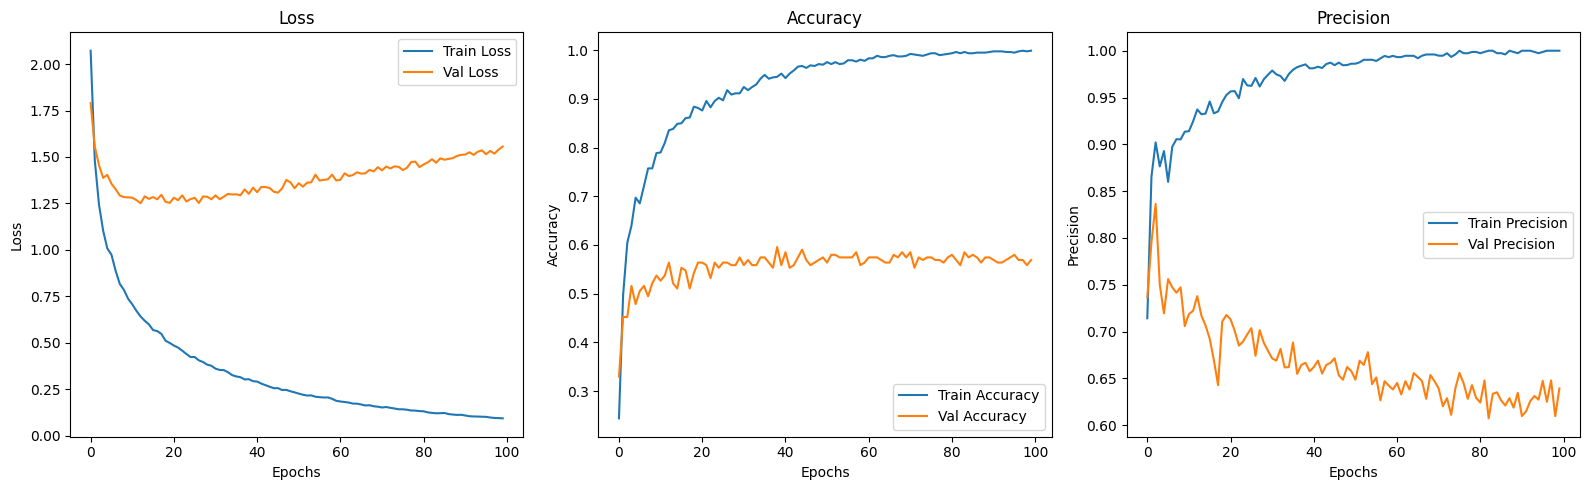

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 860ms/step


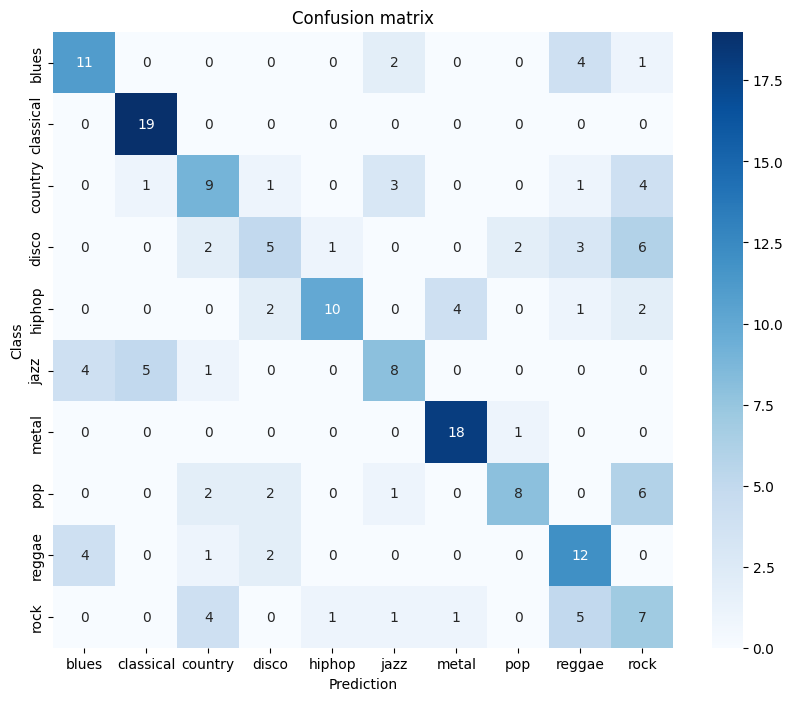


===== Trening z optymalizatorem: RMSprop =====
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2408 - loss: 2.2774 - precision_1: 0.6363 - val_accuracy: 0.4202 - val_loss: 1.6886 - val_precision_1: 0.9167
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 894ms/step - accuracy: 0.5360 - loss: 1.4795 - precision_1: 0.9019 - val_accuracy: 0.4255 - val_loss: 1.5010 - val_precision_1: 0.8333
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6294 - loss: 1.2317 - precision_1: 0.9122 - val_accuracy: 0.4894 - val_loss: 1.4110 - val_precision_1: 0.7606
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6200 - loss: 1.1202 - precision_1: 0.8859 - val_accuracy: 0.4681 - val_loss: 1.3643 - val_precision_1: 0.7848
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1000ms/step - accuracy: 0.6817 - loss: 1.0060 - precision_1: 0.9200 - val_accuracy: 0.4894 - val_loss: 1.3088 - val_precision_1: 0.7647
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7279 

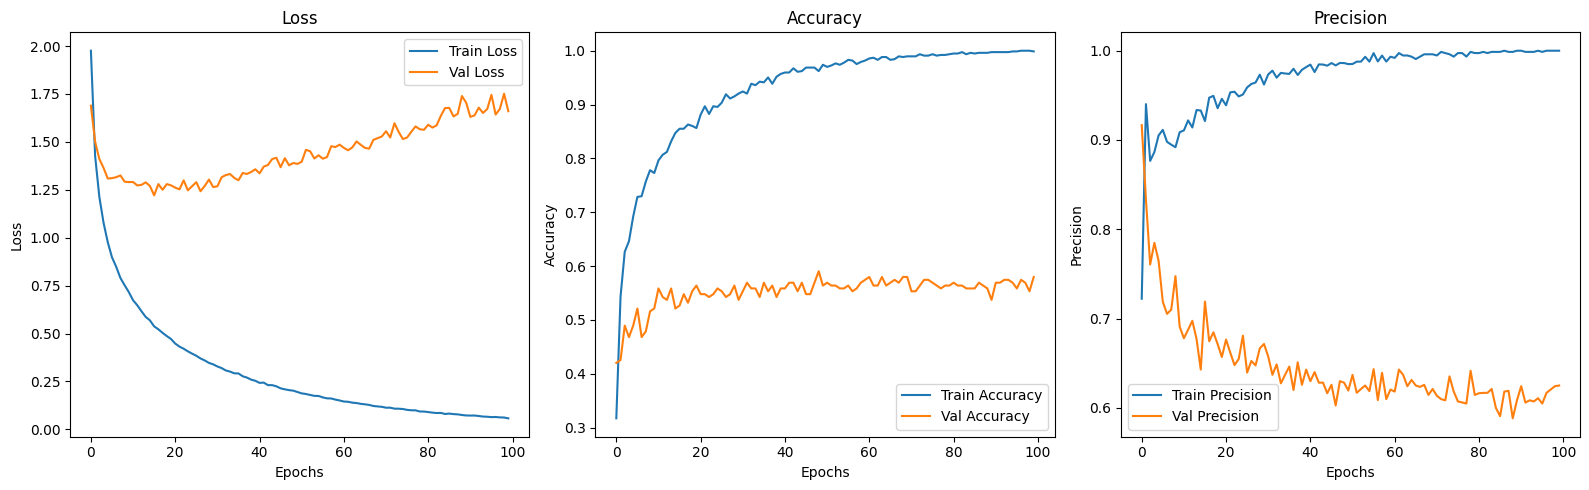

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 826ms/step


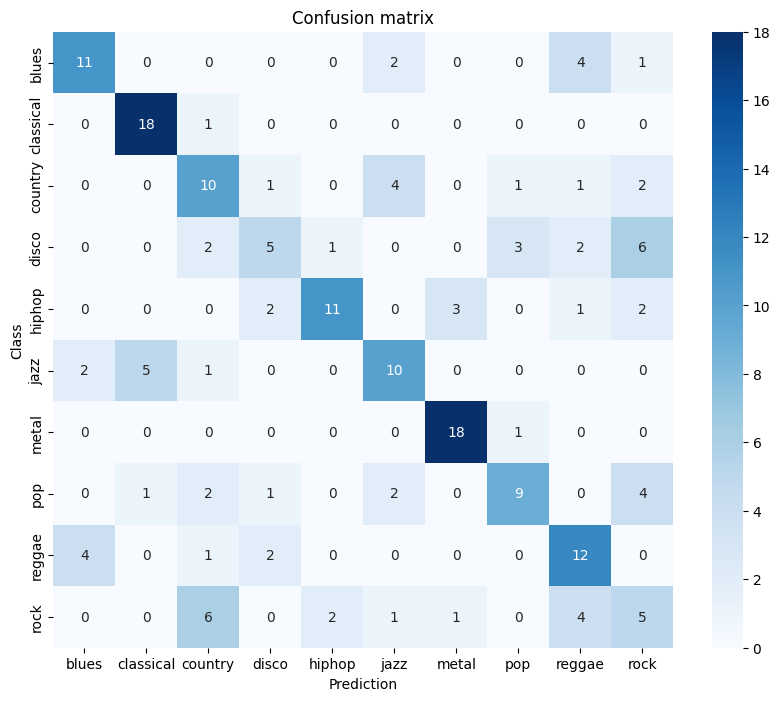

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from mobilenet_utils import plot_training_history
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np


optimizers = {
    "Adam": Adam(),
    "RMSprop": RMSprop()
}

results_summary = {}

for name, optimizer in optimizers.items():
    print(f"\n===== Trening z optymalizatorem: {name} =====")

    # Buduj model od nowa w każdej iteracji
    base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision()])

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=100
    )

    model_path="models"
    model_name = os.path.join(model_path,f"{name}_gradCAM_100epochBasic.keras" )
    model.save(model_name)
    
    # Ewaluacja
    print("\nTesting ----------------------------")
    results = model.evaluate(test_generator, verbose=0)

    test_loss, test_acc, test_precision = results[0], results[1], results[2]
    print(f"{name} - Test Loss: {test_loss:.4f} | Accuracy: {test_acc:.2%} | Precision: {test_precision:.2%}")

    # Zapisz wyniki
    results_summary[name] = {
        "loss": test_loss,
        "accuracy": test_acc,
        "precision": test_precision,
        "history": history
    }

    # Wyświetl wykresy
    plot_training_history(history)
    # Generujemy predykcje
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Prawdziwe etykiety
    y_true = val_generator.classes

    # Nazwy klas
    class_labels = list(val_generator.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Prediction")
    plt.ylabel("Class")
    plt.title("Confusion matrix")
    plt.show()



In [16]:
from gradCAM_utils import gradCAM_img_preprocess, gradCAM_compute, gradCAM_imgHeatmapOverlay
import cv2
import os
from tensorflow.keras.models import load_model
import shutil

#model.summary()



data_folder = r"C:\Users\Dell\Desktop\Music-Classification-MobileNet1\project_data\spectrograms"
gradcam_path = 'data/gradcam'
os.makedirs(gradcam_path, exist_ok=True)
os.makedirs(gradcam_path, exist_ok=True)

for filename in os.listdir(gradcam_path):
    file_path = os.path.join(gradcam_path, filename)
    shutil.rmtree(file_path)


# Iterate through each genre folder and collect file names
optimizers = {
    "Adam": Adam(),
    "RMSprop": RMSprop()
}

models_path = "models"
for name, optimizer in optimizers.items():
    gradcam_path_opt = os.path.join(gradcam_path,f"{name}_gradCAM_100epochBasic" )
    os.makedirs(gradcam_path_opt, exist_ok=True)
    model = load_model(os.path.join(models_path,f"{name}_gradCAM_100epochBasic.keras" ))
    for genre in os.listdir(data_folder):
        genre_folder = os.path.join(data_folder, genre)
        if os.path.isdir(genre_folder):
            for file_name in os.listdir(genre_folder):
                print(file_name)
                img = os.path.join(genre_folder, file_name)
                img_array = gradCAM_img_preprocess(img)
                preds = model.predict(img_array)
                class_index = np.argmax(preds[0])
                heatmap = gradCAM_compute(model, img_array, class_index)
                output_img = gradCAM_imgHeatmapOverlay(img, heatmap)
                genre_folder_grad = os.path.join(gradcam_path_opt, genre)
                os.makedirs(genre_folder_grad, exist_ok=True)
                output_path = os.path.join(genre_folder_grad, f"{file_name}_{name}gradCAM.jpg")
                cv2.imwrite(output_path, output_img)
                del output_img

blues.00000.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
blues.00001.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
blues.00002.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
blues.00003.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
blues.00004.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
blues.00005.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
blues.00006.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
blues.00007.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
blues.00008.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
blues.00009.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
blues.00010.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
blues.00011.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
blues.00012.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
blues.00013.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
blues.00014.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
blues.00015.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
blues.00016.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
blues.00017.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
blues.00018.png
1/1 ━━━━━━━━━

c:\Users\Dell\Desktop\Music-Classification-MobileNet\mobilenet\gradCAM_utils.py:34: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
c:\Users\Dell\Desktop\Music-Classification-MobileNet\mobilenet\gradCAM_utils.py:42: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255*heatmap)


hiphop.00094.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
hiphop.00095.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
hiphop.00096.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
hiphop.00097.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
hiphop.00098.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
hiphop.00099.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
jazz.00000.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
jazz.00001.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
jazz.00002.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
jazz.00003.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
jazz.00004.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
jazz.00005.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
jazz.00006.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
jazz.00007.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
jazz.00008.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
jazz.00009.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
jazz.00010.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
jazz.00011.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
jazz.00012.png
1/1 ━━━━━━━━━━━━━━━